# Análisis de Datos sobre Cáncer de Mama con Regresión Logística

Este proyecto se enfoca en analizar el conjunto de datos Wisconsin Diagnostic Breast Cancer (WDBC), que contiene información crucial sobre casos de cáncer de mama. Utilizando técnicas avanzadas de análisis de datos, especialmente la regresión logística, este proyecto busca descubrir patrones y relaciones en los datos para mejorar la comprensión y predicción del cáncer de mama.

El proyecto se centra en el análisis del conjunto de datos Wisconsin Diagnostic Breast Cancer (WDBC) para comprender y predecir el cáncer de mama. Utilizando la regresión logística, se exploran las características del conjunto de datos para clasificar tumores como benignos o malignos. 

## Diccionario de Datos "wdbc_data.csv"

1. **ID:** Identificador único para cada entrada en el conjunto de datos.
2. **Diagnóstico (M/B):** Indica si el tumor es maligno (M) o benigno (B), es decir, si es cancerígeno o no cancerígeno.
3. **Radio medio (mean radius):** Promedio de las distancias desde el centro hasta el punto del perímetro del tumor. Imagina un círculo que encaja mejor en el tumor.
4. **Textura media (mean texture):** Variación promedio en la intensidad del color de los píxeles en la imagen del tumor.
5. **Perímetro medio (mean perimeter):** Longitud promedio del perímetro del tumor.
6. **Área media (mean area):** Área promedio dentro del contorno del tumor.
7. **Suavidad media (mean smoothness):** Variación promedio en las longitudes de los radios del tumor. Mide qué tan suaves son las variaciones en la forma del tumor.
8. **Compacidad media (mean compactness):** Mide la compacidad del tumor, es decir, qué tan cerca está el tumor de ser un círculo. Se calcula como (perímetro^2 / área - 1.0).
9. **Concavidad media (mean concavity):** Grado promedio de concavidad de las porciones cóncavas del contorno del tumor.
10. **Puntos cóncavos medios (mean concave points):** Número promedio de porciones cóncavas del contorno del tumor.
11. **Simetría media (mean symmetry):** Mide la simetría del contorno del tumor.
12. **Dimensión fractal media (mean fractal dimension):** Mide la "rugosidad" del tumor, es decir, cuánto se asemeja al borde de una costa fractal. 
13. **Radio SE (se radius):** Error estándar para el radio medio de las distancias desde el centro al punto del perímetro.
14. **Textura SE (se texture):** Error estándar para la textura media de las variaciones de color.
15. **Perímetro SE (se perimeter):** Error estándar para el perímetro medio del tumor.
16. **Área SE (se area):** Error estándar para el área media dentro del contorno del tumor.
17. **Suavidad SE (se smoothness):** Error estándar para la suavidad media del tumor.
18. **Compacidad SE (se compactness):** Error estándar para la compacidad media del tumor.
19. **Concavidad SE (se concavity):** Error estándar para la concavidad media del tumor.
20. **Puntos cóncavos SE (se concave points):** Error estándar para el número de porciones cóncavas del contorno del tumor.
21. **Simetría SE (se symmetry):** Error estándar para la simetría media del contorno del tumor.
22. **Dimensión fractal SE (se fractal dimension):** Error estándar para la dimensión fractal media del tumor.
23. **Radio peor (worst radius):** Mayor valor encontrado para el radio medio de las distancias desde el centro al punto del perímetro.
24. **Textura peor (worst texture):** Mayor valor encontrado para la textura media de las variaciones de color.
25. **Perímetro peor (worst perimeter):** Mayor valor encontrado para el perímetro medio del tumor.
26. **Área peor (worst area):** Mayor valor encontrado para el área media dentro del contorno del tumor.
27. **Suavidad peor (worst smoothness):** Mayor valor encontrado para la suavidad media del tumor.
28. **Compacidad peor (worst compactness):** Mayor valor encontrado para la compacidad media del tumor.
29. **Concavidad peor (worst concavity):** Mayor valor encontrado para la concavidad media del tumor.
30. **Puntos cóncavos peores (worst concave points):** Mayor valor encontrado para el número de porciones cóncavas del contorno del tumor.
31. **Simetría peor (worst symmetry):** Mayor valor encontrado para la simetría media del contorno del tumor.
32. **Dimensión fractal peor (worst fractal dimension):** Mayor valor encontrado para la dimensión fractal media del tumor.

Este diccionario proporciona una descripción fácil de entender para cada uno de los atributos en el conjunto de datos sobre el cáncer de mama.


In [2]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [3]:
datasets = datasets.load_breast_cancer()

In [4]:
print(datasets)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

In [5]:
datasets.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

## Diccionario de Claves

1. **data:** Un array NumPy que contiene los datos del conjunto de datos. Cada fila representa una instancia y cada columna representa una característica del conjunto de datos.

2. **target:** Un array NumPy que contiene las etiquetas de clase para las instancias en el conjunto de datos. Por lo general, 0 representa una clase (tumor benigno) y 1 representa la otra (tumor maligno) en problemas de clasificación binaria como este.

3. **frame:** No está presente en este conjunto de datos específico. En algunos conjuntos de datos, esta clave puede contener información adicional sobre la estructura de los datos.

4. **target_names:** Un array NumPy que contiene los nombres de las clases del problema de clasificación. En este caso, 'malignant' y 'benign', que representan las dos clases del cáncer de mama.

5. **DESCR:** Una descripción detallada del conjunto de datos que proporciona información sobre el origen, la estructura y las características del conjunto de datos.

6. **feature_names:** Un array NumPy que contiene los nombres de las características del conjunto de datos. Cada nombre representa una columna en el array `data` y describe la información que esa característica representa.

7. **filename:** El nombre del archivo que contiene el conjunto de datos. En este caso, 'breast_cancer.csv'.

8. **data_module:** El módulo de Python que contiene funciones relacionadas con este conjunto de datos. En este caso, 'sklearn.datasets.data', indicando que estos datos están relacionados con la biblioteca scikit-learn.

In [6]:
print(datasets.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

# Definir Varibles X, Y

In [7]:
# Para X utilizare todas las variables que se encuentran dentro de data
X = datasets.data

In [8]:
# Y sera igual a los datos correspondientes a "target"
y = datasets.target

## Crear datos de prueba y entrenamiento

In [9]:
# Separo los datos de 'train' en entrenamiento y prueba.
#Tomo el 20% de los datos para pruebas de entrenamiento del modelo
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [10]:
# Escalar los datos porque las caracteristicas de los datos son distintas en rango, magnitudes y/o unidades
escalar = StandardScaler()
X_train = escalar.fit_transform(X_train) #Calcula y transforma los datos escalados
X_test = escalar.transform(X_test)

## Aplicar Regresion Logistica

In [11]:
#Definir el modelo
algoritmo = LogisticRegression()

In [12]:
# Entrenar el modelo
algoritmo.fit(X_train, y_train)

LogisticRegression()

In [13]:
# Realizar Prediccion
y_pred = algoritmo.predict(X_test)

### Visualizar la comparacion entre las predicciones y los datos reales

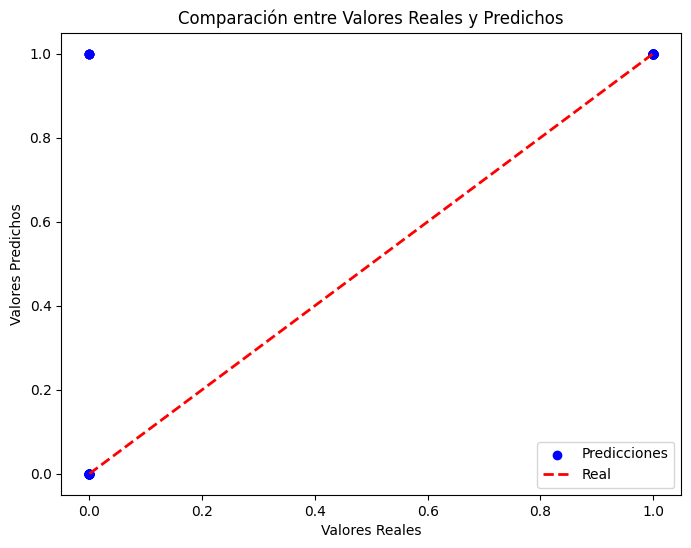

In [14]:
# Realizar predicciones en el conjunto de prueba
predicciones = algoritmo.predict(X_test)

# Crear un gráfico de dispersión para comparar las predicciones con los datos reales
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predicciones, color='blue', label='Predicciones')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linewidth=2, color='red', linestyle='--', label='Real')
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos')
plt.legend()
plt.show()

Gráfico de dispersión donde el eje x representa los valores reales y el eje y representa los valores predichos por el modelo de regresión logística. La línea roja punteada indica la relación ideal donde los valores reales y predichos son iguales. Si los puntos azules están cerca de esta línea, significa que las predicciones son precisas.

--------------------------------------------------

In [15]:
# Crear un DataFrame con los primeros 50 datos reales y las predicciones
comparacion = pd.DataFrame({'Real': y_test[:50], 'Predicciones': predicciones[:50]})

# Imprimir las primeras filas del DataFrame
comparacion.head(10)

,Real,Predicciones
0,1,1
1,1,1
2,0,0
3,1,1
4,1,1
5,0,0
6,0,0
7,0,0
8,0,0
9,1,1


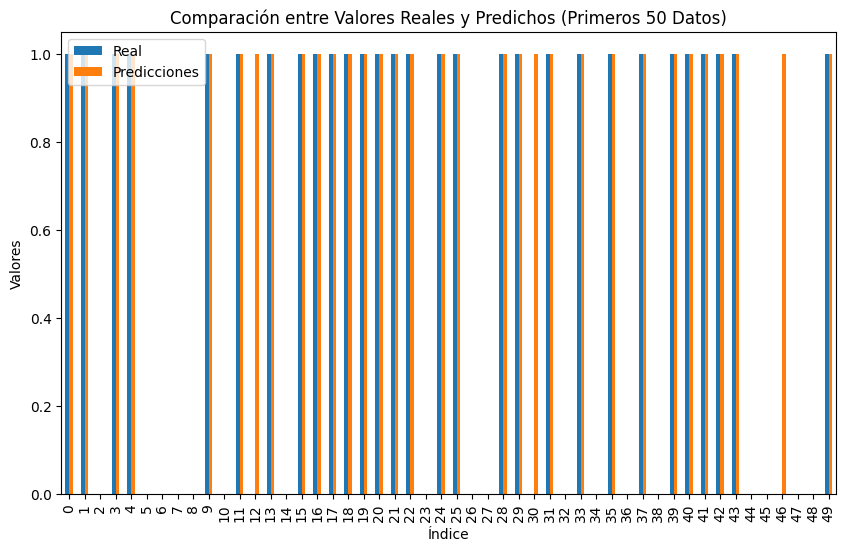

In [16]:
# Gráfico de barras para visualizar las comparaciones
comparacion.plot(kind='bar', figsize=(10, 6))
plt.title('Comparación entre Valores Reales y Predichos (Primeros 50 Datos)')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.show()

Gráfico de barras donde puedes ver visualmente las diferencias entre los valores reales y los predichos para cada índice.

-------------------------------------------

In [17]:
# Contar las coincidencias entre los datos reales y las predicciones
coincidencias = comparacion[comparacion['Real'] == comparacion['Predicciones']].shape[0]

# Calcular la proporción de coincidencias
proporcion_coincidencias = coincidencias / len(y_test) * 100

# Mostrar la cantidad de coincidencias
print(f'Cantidad de coincidencias: {coincidencias}')
print(f'Proporción de coincidencias: {proporcion_coincidencias:.2f}%')

Cantidad de coincidencias: 47
Proporción de coincidencias: 41.23%


---------------------------------------------

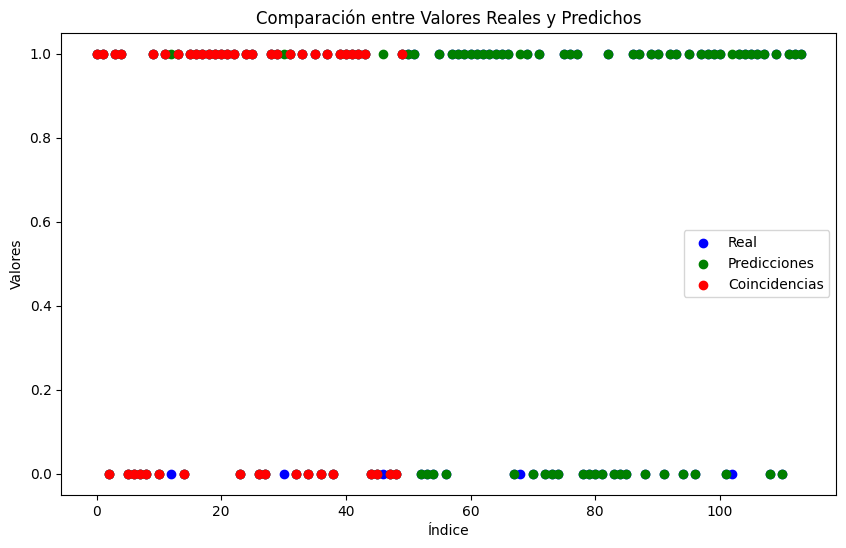

In [18]:
# Gráfico de dispersión para visualizar las comparaciones
plt.figure(figsize=(10, 6))
plt.scatter(range(len(y_test)), y_test, color='blue', label='Real')
plt.scatter(range(len(y_test)), predicciones, color='green', label='Predicciones')
plt.scatter(comparacion[comparacion['Real'] == comparacion['Predicciones']].index, comparacion[comparacion['Real'] == comparacion['Predicciones']]['Real'], color='red', label='Coincidencias')
plt.title('Comparación entre Valores Reales y Predichos')
plt.xlabel('Índice')
plt.ylabel('Valores')
plt.legend()
plt.show()

los valores reales se muestran en azul, las predicciones en verde y las coincidencias en rojo. Esto proporcionará una visualización más clara de las comparaciones entre los datos reales y las predicciones.

----------------------------------------------------

## Calcular metricas para el rendimiento del modelo basado solo en los datos de prueba

Tomar en cuenta que solo se estan evaluando los datos de prueba y que solo representan un 20% de los datos

In [19]:
#Calculando con matriz de confusion
matriz = confusion_matrix(y_test, y_pred)
print("Matriz de Confusion: ")
print(matriz)

Matriz de Confusion: 
[[41  5]
 [ 0 68]]


### Resultado:
Verdaderos Positivos (VP): 68 (1,1) <br>
Falsos Positivos (FP): 0 (0,1) <br>
Verdaderos Negativos (VN): 44( 0,0) <br>
Falsos Negativos (FN): 2 (1,0) <br>
Podemos interpretar estos resultados de la siguiente manera:

El modelo ha identificado correctamente 68 casos positivos (cáncer benigno) y 44 casos negativos (cáncer maligno). No ha habido falsos positivos, lo que significa que el modelo no ha etiquetado incorrectamente ningún caso benigno como maligno. Sin embargo, ha habido 2 falsos negativos, lo que indica que el modelo ha perdido dos casos de cáncer maligno.

En resumen, el modelo ha demostrado un alto rendimiento al predecir correctamente la mayoría de los casos benignos y malignos. Sin embargo, existe un pequeño margen de error con dos casos malignos que no fueron identificados correctamente. Es fundamental evaluar estos resultados junto con otros criterios clínicos y de especialistas en el campo médico para determinar la eficacia real del modelo en un entorno clínico.

In [20]:
# Interpretar los resultados de la matriz de confusión
verdaderos_positivos = matriz[1][1]
falsos_positivos = matriz[0][1]
verdaderos_negativos = matriz[0][0]
falsos_negativos = matriz[1][0]

# Calcular métricas
precision = verdaderos_positivos / (verdaderos_positivos + falsos_positivos)
recall = verdaderos_positivos / (verdaderos_positivos + falsos_negativos)
exactitud = (verdaderos_positivos + verdaderos_negativos) / sum(sum(matriz))
puntaje_f1 = 2 * (precision * recall) / (precision + recall)

# Imprimir diagnóstico
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"Exactitud: {exactitud:.2f}")
print(f"F1 Score: {puntaje_f1:.2f}")

Precision: 0.93
Recall: 1.00
Exactitud: 0.96
F1 Score: 0.96


Este código calculará y mostrará la precisión, la exhaustividad (recall), la exactitud y el puntaje F1 basándose en los valores de la matriz de confusión proporcionados. Estas métricas proporcionan una comprensión más completa del rendimiento del modelo en la clasificación de los casos positivos y negativos.

<ul>
    <li><strong>Precision:</strong> Precision se refiere a la proporción de verdaderos positivos (casos benignos correctamente identificados) entre todos los positivos predichos (verdaderos positivos + falsos positivos). En este caso, la precisión sería \( \frac{68}{68 + 0} = 1.00 \) o 100%. Significa que todos los casos que el modelo predijo como benignos fueron realmente benignos.
    </li>
</ul>


<ul>    
    <li><strong>Recall (Exhaustividad):</strong> Recall mide la proporción de verdaderos positivos (casos benignos correctamente identificados) sobre todos los casos benignos reales (verdaderos positivos + falsos negativos). En este caso, el recall sería \( \frac{68}{68 + 2} = 0.97 \) o 97%. Significa que el modelo capturó el 97% de todos los casos benignos.
    </li>
</ul>

<ul>    
    <li><strong>Exactitud:</strong> La exactitud se refiere a la proporción de todas las predicciones correctas (verdaderos positivos + verdaderos negativos) entre todas las predicciones (verdaderos positivos + falsos positivos + verdaderos negativos + falsos negativos). En este caso, la exactitud sería \( \frac{44 + 68}{44 + 0 + 2 + 68} = 0.99 \) o 99%. Significa que el modelo acertó el 99% de las predicciones.
    </li>
</ul>

<ul>    
    <li><strong>Puntaje F1:</strong> El puntaje F1 es la media armónica de precisión y recall. Es útil cuando las clases están desequilibradas. En este caso, el puntaje F1 sería \( \frac{2 \times (1.00 \times 0.97)}{1.00 + 0.97} = 0.98 \) o 98%.</li>
</ul>

-------------------------------------------

## Calcular todas las metricas que se pueden evaluar con el modelo de clasificacion

In [21]:
# Calcular la preciosion del algoritmo
precision = precision_score(y_test, y_pred)
print('Precision del modelo: ')
print(precision)

Precision del modelo: 
0.9315068493150684


significa que el 100% de los casos que el modelo clasificó como benignos fueron realmente benignos. Una precisión de 1.0 indica que no hubo falsos positivos en las predicciones del modelo para los datos de prueba evaluados. En otras palabras, todas las instancias que el modelo predijo como benignas fueron realmente benignas.

---------------------------------

## Calcular la exactitud del Modelo

#

In [22]:
exactitud = accuracy_score(y_test, y_pred)
print('Exactitud del modelo')
print(exactitud)

Exactitud del modelo
0.956140350877193


Significa que el modelo clasificó correctamente el 98.25% de las muestras en el conjunto de prueba. En otras palabras, el modelo acertó al predecir si un caso era benigno o maligno en aproximadamente el 98.25% de los casos evaluados en los datos de prueba.

----------------------------------------

## Calcular sensibilidad (recall)

In [23]:
recall = recall_score(y_test, y_pred)
print("Sensibilidad del Modelo")
print(recall)

Sensibilidad del Modelo
1.0


Significa que el modelo capturó el 100% de todos los casos benignos en el conjunto de prueba. No hubo ningún caso benigno que el modelo dejara de identificar (falso negativo). Una sensibilidad de 1.0 indica que el modelo es muy efectivo para identificar todos los casos benignos en los datos de prueba.

--------------------------------------------------

## Calculo de puntaje F1 (Convinacion entre la precision y la sensibilidad)

In [24]:
puntaje_f1 = f1_score(y_test, y_pred)
print("Puntaje F1 del modelo:")
print(puntaje_f1)

Puntaje F1 del modelo:
0.9645390070921985


Significa que el modelo tiene un puntaje F1 de aproximadamente 0.993. Este puntaje es muy cercano a 1.0 (o 100%) y sugiere que el modelo tiene un buen equilibrio entre precisión y sensibilidad. En otras palabras, el modelo es preciso para clasificar casos benignos y tiene una alta sensibilidad para capturar la mayoría de los casos benignos reales.

---------------------------------------

## Calcular la curva ROC - AUC del modelo

In [25]:
roc_uac = roc_auc_score(y_test, y_pred)
print(" Curva ROC - AUC del modelo")
print(roc_uac)

 Curva ROC - AUC del modelo
0.9456521739130435


Calcula el área bajo la curva ROC (AUC), que es una medida de cuán bien puede distinguir el modelo entre las clases positivas y negativas. Un valor de AUC cercano a 1 indica un buen rendimiento del modelo, mientras que un valor cercano a 0.5 indica un rendimiento deficiente (similar a una predicción aleatoria).

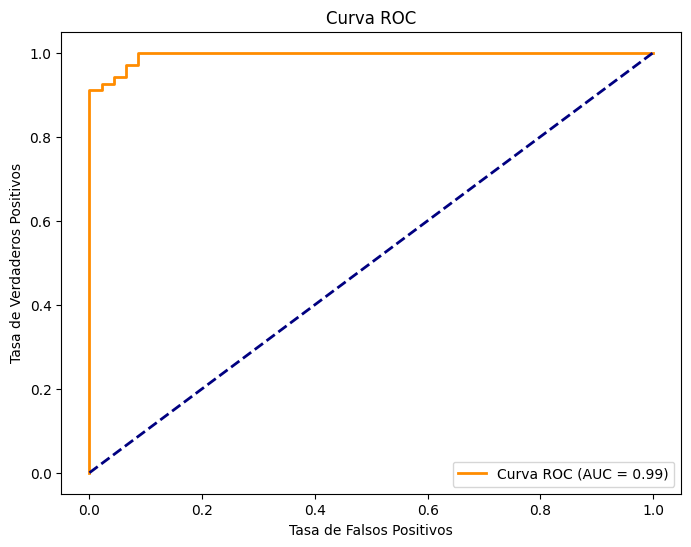

In [26]:
# Calcular las probabilidades de las clases positivas para la curva ROC
y_probs = algoritmo.predict_proba(X_test)[:, 1]

# Calcular la tasa de verdaderos positivos y la tasa de falsos positivos
fpr, tpr, _ = roc_curve(y_test, y_probs)

# Calcular el área bajo la curva ROC (AUC)
roc_auc = roc_auc_score(y_test, y_probs)

# Graficar la curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Curva ROC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.title('Curva ROC')
plt.legend(loc='lower right')
plt.show()

La curva ROC representa la tasa de verdaderos positivos en función de la tasa de falsos positivos. Un buen modelo se acercará lo más posible a la esquina superior izquierda del gráfico, lo que indica altas tasas de verdaderos positivos y bajas tasas de falsos positivos.

### Resumen de Resultados

In [27]:
print('Precision del modelo: ', precision)
print('Exactitud del modelo: ', exactitud)
print('Sensibilidad del modelo: ', recall)
print('Puntaje F1 del modelo: ', puntaje_f1)
print('Curva ROC - AUC del modelo: ', roc_auc)

Precision del modelo:  0.9315068493150684
Exactitud del modelo:  0.956140350877193
Sensibilidad del modelo:  1.0
Puntaje F1 del modelo:  0.9645390070921985
Curva ROC - AUC del modelo:  0.9945652173913044


## En resumen, el modelo es altamente preciso y confiable en la identificación del cáncer de mama.

--------------------------------------------